In [26]:
import torch
import torchvision
from torchvision import transforms, datasets

In [27]:
train = datasets.MNIST("", train=True, download=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                       transform= transforms.Compose([transforms.ToTensor()]))

In [28]:
train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)


In [29]:
for images, labels in train_set:
    print(images)
    print(labels)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [30]:
x = images[0]
y = labels

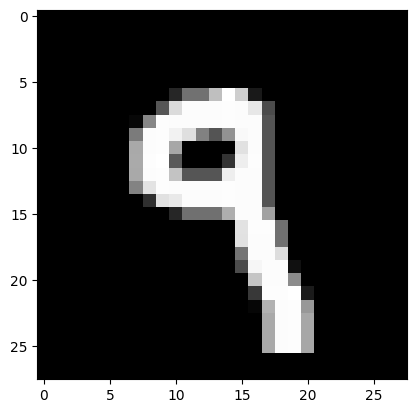

In [31]:
import matplotlib.pyplot as plt

plt.imshow(x.view(28,28), cmap="gray")
plt.show()

In [32]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in train_set:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1

for i in counter_dict:
    print(counter_dict[i]/total*100)

9.871666666666666
11.236666666666666
9.93
10.218333333333334
9.736666666666666
9.035
9.863333333333333
10.441666666666666
9.751666666666667
9.915000000000001


In [33]:
import torch.nn as nn
import torch.nn.functional as F

In [34]:
class a:
    '''Will be a parent class'''
    def __init__(self):
        print("initializing a")

class b(a):
    '''Inherits from a, but does not run a's init method '''
    def __init__(self):
        print("initializing b")

class c(a):
    '''Inhereits from a, but DOES run a's init method'''
    def __init__(self):
        super().__init__()
        print("initializing c")

b_ob = b()

initializing b


In [35]:
c_ob = c()

initializing a
initializing c


In [37]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() #Comment this

        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1) #by Default it also set to None the log_softmax function will be applied along the last dimension, which is dim=1 for a 2D tensor.

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [42]:
X = torch.randn((28,28))
output = net(X)
output

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28x28 and 784x64)

In [40]:
X = torch.randn((28,28))
X = X.view(-1,28*28)
output = net(X)
output

tensor([[-2.3097, -2.3265, -2.3390, -2.3897, -2.2004, -2.2755, -2.3776, -2.3427,
         -2.2154, -2.2678]], grad_fn=<LogSoftmaxBackward0>)

In [46]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3 #Whole passes to the dataset

for epochs in range(EPOCHS):
    for images, labels in train_set:
         net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.

         output = net(images.view(-1, 28*28))
         loss = F.nll_loss(output, labels)
         loss.backward()
         optimizer.step()
    print(loss)

tensor(0.0711, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)


In [50]:
correct = 0
total = 0

with torch.no_grad():  #Dont calculate the gradient 
    for data in test_set:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            # print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.965


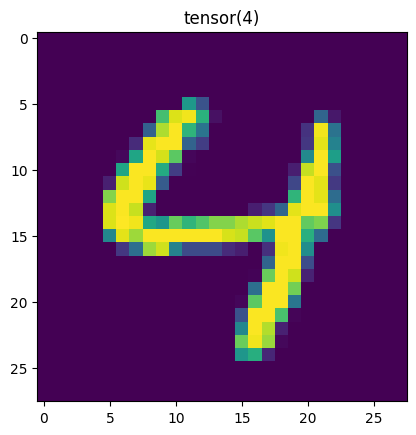

In [52]:
import matplotlib.pyplot as plt
i = 0

plt.imshow(X[0].view(28,28))
plt.title(torch.argmax( net(X[i].view(-1,784) )[0] ))
plt.show()